In [103]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit


In [104]:
data = np.loadtxt("exampledata4.txt")

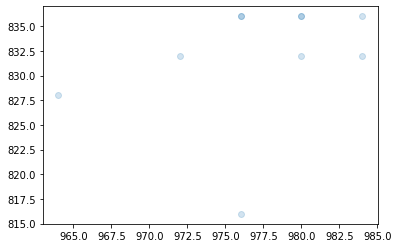

In [105]:
plt.scatter(data[:,0]*4, data[:,1]*4,alpha=0.2)

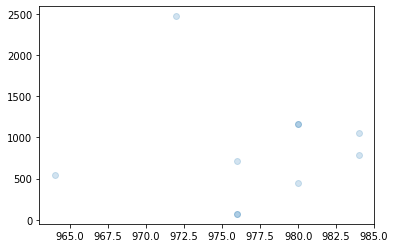

In [106]:
plt.scatter(data[:,0]*4, data[:,2],alpha=0.2)
#plt.ylim(290,310)

(290, 310)

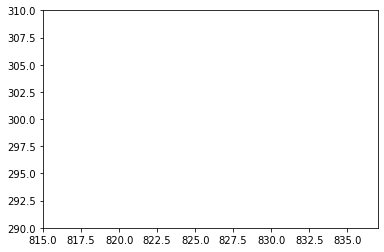

In [107]:
plt.scatter(data[:,1]*4, data[:,2],alpha=0.2)
plt.ylim(290,310)

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


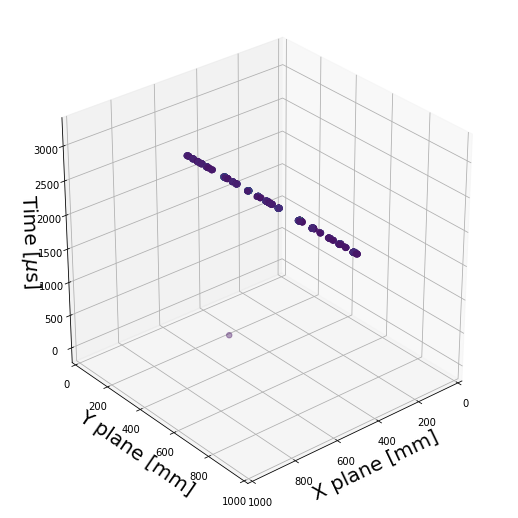

In [19]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
DQ = 1/data[:,3]
DQ[DQ<1]=0
size = np.ones(len(DQ))*30
size[DQ<1]=0
#ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=DQ,marker='s',c=DQ, cmap='Reds')
ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=size,c=DQ, cmap='viridis')

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
#ax.set_zlim(0,1000)
#ax.set_zlim(0,600)
ax.view_init(None, 50)

ax.set_xlabel('X plane [mm]', fontsize=20, rotation=150)
ax.set_ylabel('Y plane [mm]', fontsize=20, rotation=150)
ax.set_zlabel(r'Time [$\mu$s]', fontsize=20, rotation=150)
plt.show()

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


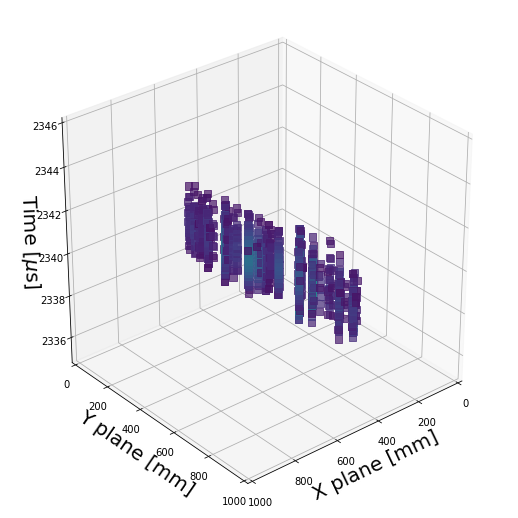

In [30]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
DQ = 1/data[:,3]
DQ[DQ<1]=0
size = np.ones(len(DQ))*50
size[DQ<1]=0
#ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=DQ,marker='s',c=DQ, cmap='Reds')
ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=size,c=DQ, cmap='viridis',marker='s',alpha=0.7)

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.set_zlim(2335,2346)
#ax.set_zlim(300,304)
ax.view_init(None, 50)

ax.set_xlabel('X plane [mm]', fontsize=20, rotation=150)
ax.set_ylabel('Y plane [mm]', fontsize=20, rotation=150)
ax.set_zlabel(r'Time [$\mu$s]', fontsize=20, rotation=150)

plt.show()

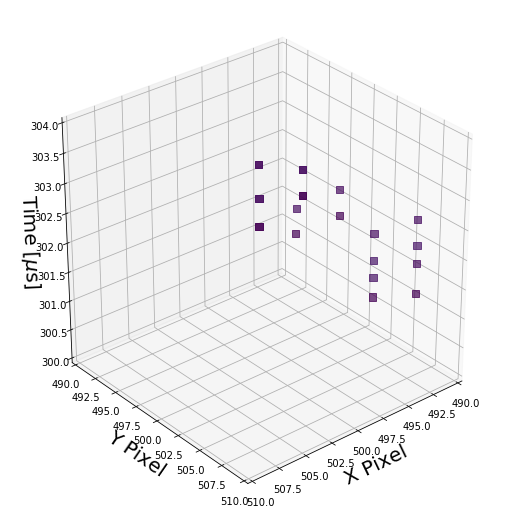

In [28]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
DQ = 1/data[:,3]
#DQ[DQ<1]=0
size = np.ones(len(DQ))*50
#size[DQ<1]=0
#ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=DQ,marker='s',c=DQ, cmap='Reds')
ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=size,c=DQ, cmap='viridis',marker='s',alpha=0.7)

ax.set_xlim(490,510)
ax.set_ylim(490,510)
ax.set_zlim(290,310)
ax.set_zlim(300,304)
ax.view_init(None, 50)

ax.set_xlabel('X Pixel', fontsize=20, rotation=150)
ax.set_ylabel('Y Pixel', fontsize=20, rotation=150)
ax.set_zlabel(r'Time [$\mu$s]', fontsize=20, rotation=150)
plt.show()

In [31]:
allpairs = []
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    allpairs.append([xx,yy])
allpairs = np.array(allpairs)
unipairs = np.unique(allpairs, axis=0)
print(len(unipairs))

freq = []
for p in unipairs:
    xloc = p[0]
    yloc = p[1]
    hold = 0
    for x in range(0,len(data[:,0])):
        xx = data[:,0][x]
        yy = data[:,1][x]
        if (xx == xloc) and (yy == yloc):
            hold+=1
    freq.append(hold)
freq = np.array(freq)

307


In [32]:
freq

array([  1,   2,   1,   2,   1,   2,   1,   1,   2,   1,   2,   1,   1,
         1,   1,   1,   1,   1,   2,   2,   2,   1,   1,   2,   1,   1,
         1,   1,   6,   2,   1,   2,   1,   1,   2,   1,   1,   2,   2,
         1,   1,   1,   4,   4,   2,   2,   1,   1,   1,   1,   2,   1,
         1,   1,   1,   1,   1,   2,   1,   2,   2,   8,   9,   4,   6,
        10,   1,   2,   6,   6,   6,   1,  16,   9,   1,   3,  24,   9,
         3,   6,   1,   6,   2,   2,   2,   5,  42,  14,   5,  14,   4,
         1,   2,  10,   4,   6,   9,   1,  30,  17,   1,   4,  13,   2,
         4,   5,   3,  22,   8,   1,  10,   4,   4,  10,  14,   9,  11,
        48,   7,   3,   4,   6,   9,   2,   2,   1,   3,   2,   1,   3,
         2,   1,   2,   5,   2,   1,   1,   4,   3,   1,   8,   8,   4,
         8,  10,   1,   2,   6,   6,   7,   1,  14,   7,   2,  24,   9,
         3,   8,   1,   6,   2,   2,   2,   1,   5,  46,  13,   4,  14,
         4,   2,  10,   6,   8,  10,   2,  36,  21,   4,  18,   

In [33]:
ff = np.where(freq > 40)
freq[ff]

array([ 42,  48,  46, 112])

In [34]:
np.where(freq == 78)

(array([], dtype=int64),)

In [35]:
np.where(freq == max(freq))

(array([196]),)

In [38]:
unipairs[196]

array([126., 173.])

In [39]:
tes = []
tes2=[]
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    if (xx == 126) and (yy == 173):
        tes.append(data[:,2][x])
        tes2.append(data[:,3][x])

tes=np.array(tes)
tes2=np.array(tes2)

len(tes)

112

In [40]:
tes

array([2338.01, 2338.31, 2338.51, 2338.67, 2338.79, 2338.9 , 2339.  ,
       2339.09, 2339.17, 2339.24, 2339.32, 2339.38, 2339.45, 2339.51,
       2339.57, 2339.62, 2339.68, 2339.74, 2339.79, 2339.84, 2339.89,
       2339.94, 2339.99, 2340.04, 2340.09, 2340.14, 2340.19, 2340.24,
       2340.29, 2340.33, 2340.38, 2340.43, 2340.48, 2340.53, 2340.58,
       2340.63, 2340.69, 2340.74, 2340.79, 2340.85, 2340.91, 2340.97,
       2341.03, 2341.1 , 2341.16, 2341.24, 2341.32, 2341.4 , 2341.49,
       2341.58, 2341.69, 2341.82, 2341.98, 2342.18, 2342.5 , 2343.57,
       2338.01, 2338.31, 2338.51, 2338.67, 2338.79, 2338.9 , 2339.  ,
       2339.09, 2339.17, 2339.24, 2339.32, 2339.38, 2339.45, 2339.51,
       2339.57, 2339.62, 2339.68, 2339.74, 2339.79, 2339.84, 2339.89,
       2339.94, 2339.99, 2340.04, 2340.09, 2340.14, 2340.19, 2340.24,
       2340.29, 2340.33, 2340.38, 2340.43, 2340.48, 2340.53, 2340.58,
       2340.63, 2340.69, 2340.74, 2340.79, 2340.85, 2340.91, 2340.97,
       2341.03, 2341

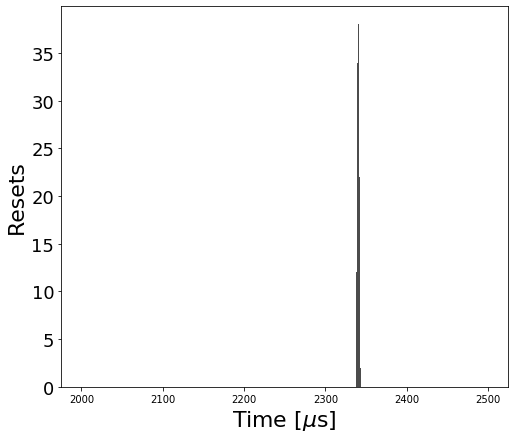

In [43]:
plt.figure(figsize=(8,7))
bins = np.arange(2000,2500,1)
#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)
#plt.hist(tes,rwidth=0.9,color='k',alpha=0.7)
#plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

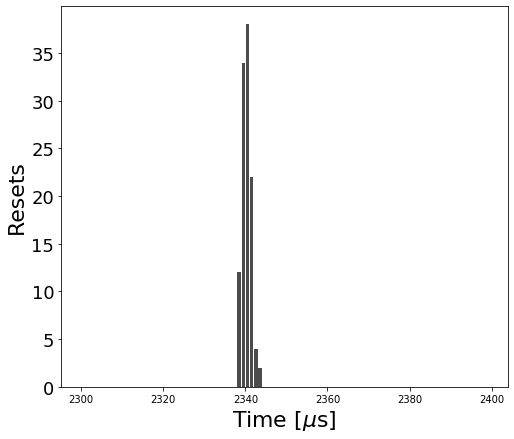

In [47]:
plt.figure(figsize=(8,7))
bins = np.arange(2300,2400,1)

#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

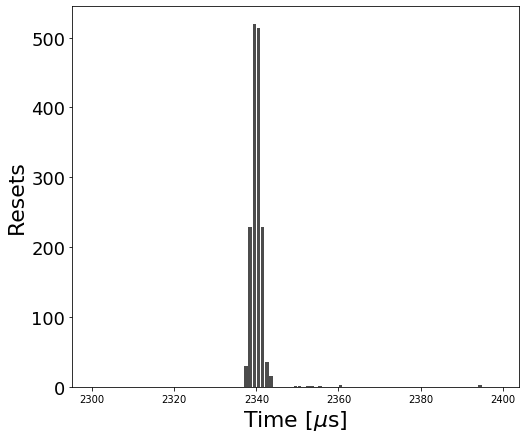

In [48]:
plt.figure(figsize=(8,7))
bins = np.arange(2300,2400,1)
#bins = np.arange(100,600,1)

plt.hist(data[:,2],bins=bins,rwidth=0.9,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

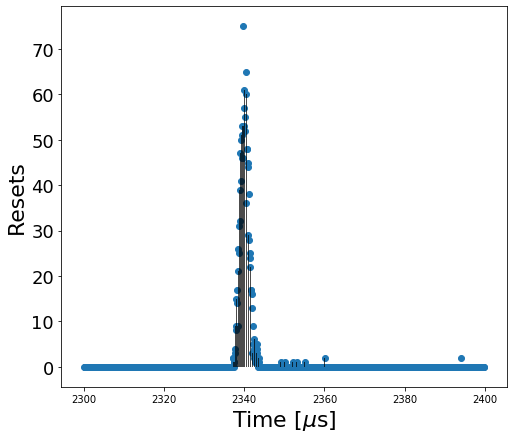

In [54]:
plt.figure(figsize=(8,7))
bins = np.arange(2300,2400,.1)
#bins = np.arange(40,60,0.5)
plt.hist(data[:,2],bins=bins,rwidth=0.9,color='k',alpha=0.7)

a,b = np.histogram(data[:,2],bins=bins)
bc = (b[1:] + b[:-1])/2
plt.scatter(bc,a)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [55]:
a,b = np.histogram(data[:,2],bins=bins)
bc = (b[1:] + b[:-1])/2

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,bc,a,p0=[1,2340,1])
print(popt)

[5.86146321e+01 2.33999275e+03 1.07386935e+00]


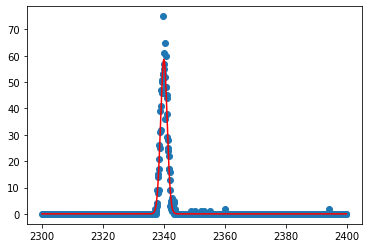

In [56]:
xval = bins#np.arange(10,90,0.1)
plt.scatter(bc,a)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')


In [59]:
(popt[2]**2*E_vel**3)/(2*DiffusionL)

3782.802883232795

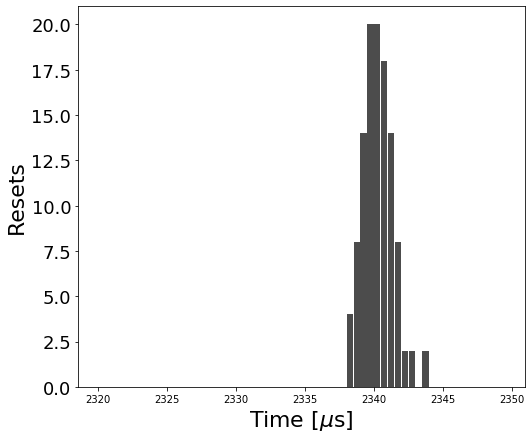

In [97]:
plt.figure(figsize=(8,7))
bins = np.arange(2320,2350,0.5)
#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)
#plt.hist(tes,rwidth=0.9,color='k',alpha=0.7)
#plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [98]:
a,b = np.histogram(tes,bins=bins)
bc = (b[1:] + b[:-1])/2

In [99]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,bc,a,p0=[30,2340,5])
print(popt)

[2.09810566e+01 2.34021885e+03 1.06388424e+00]


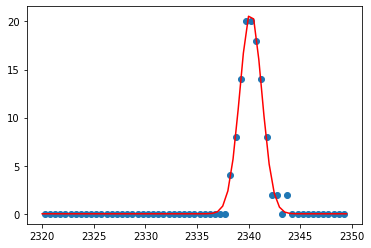

In [100]:
xval = bins#np.arange(10,90,0.1)
plt.scatter(bc,a)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')


In [101]:
E_vel = 1.648#; //mm/mus
DiffusionL = 682.23/1e6#;  //mm**2/mus
DiffusionT = 1315.86/1e6#; //mm**2/mus

In [102]:

(popt[2]**2*E_vel**3)/(2*DiffusionL)

3712.7829491604152

In [96]:
(popt[2]**2*E_vel**2)/(2*DiffusionL)

2454.5583735789337

In [35]:
tes = []
tes2=[]
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    if (xx == 126) and (yy == 152):
        tes.append(data[:,2][x])
        tes2.append(1/data[:,3][x])

tes=np.array(tes)
tes2=np.array(tes2)

len(tes)

42

(250, 350)

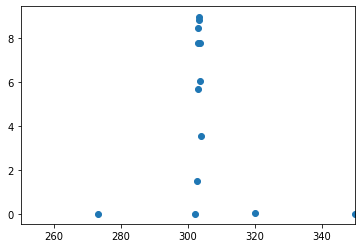

In [36]:
plt.scatter(tes,tes2)
plt.xlim(250,350)

In [37]:
popt,pcov = curve_fit(gaus,tes,tes2,p0=[1,300,1])
print(popt)

[  9.10529448 303.29195628   0.39979361]


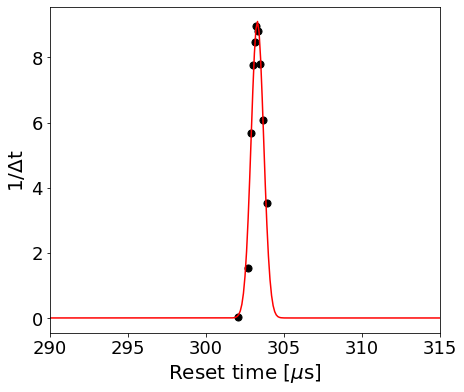

In [51]:
plt.figure(figsize=(7,6))
xval = np.arange(250,350,0.1)
plt.scatter(tes,tes2,color='k',s=50)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')

plt.xlim(290,315)
plt.xlabel(r"Reset time [$\mu$s]",fontsize=20)
plt.ylabel(r"1/$\Delta$t ",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [39]:
(popt[2]**2*E_vel**3)/(2*DiffusionL)

524.3031993154112

In [33]:
(popt[2]**2*E_vel**2)/(2*DiffusionL)

290.8639847643645

In [6]:
X=200
Y=321

In [10]:
idd = X*10000+Y

In [11]:
idd

2000321

In [13]:
idd/10000

200.0321

In [14]:
idd = Y*10000+X
idd

3210200

In [15]:
idd/10000

321.02

In [16]:
0.02*10000

200.0

In [19]:
127206/1000

127.206

In [20]:
0.206*1000

206.0